In [ ]:
import pandas as pd
df = pd.read_excel('/kaggle/input/labelling/labelling.xlsx')
df.head()

,nama_tempat,user,rating,review,sentiment_bener
0,101Urban Jakarta Glodok - Kota Tua,Anagata Story01,1,"Fasilitas amenities, seperti hal kopi teh yang...",-1
1,101Urban Jakarta Glodok - Kota Tua,Wil Ham,1,dsini pelayanannya sangat buruk.. dan hotelnya...,-1
2,101Urban Jakarta Glodok - Kota Tua,Bintang Putri16,1,"Kamar bau bnget, saya baru check in trus langs...",-1
3,101Urban Jakarta Glodok - Kota Tua,Devika Natalia,1,"bad service, hotel belum jadi baru take over u...",0
4,101Urban Jakarta Glodok - Kota Tua,rinrin damayanti,1,"Pelayanannya bagus,\nUntuk roomnya kurang pert...",-1


In [ ]:
df = df[['nama_tempat','review','rating','sentiment_bener']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama_tempat      8047 non-null   object
 1   review           8047 non-null   object
 2   rating           8047 non-null   object
 3   sentiment_bener  8047 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 251.6+ KB


# EDA


In [ ]:
print(f"Jumlah baris dan kolom: {df.shape}")
print("\nJumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())
print("\nJumlah baris duplikat:")
print(df.duplicated().sum())

Jumlah baris dan kolom: (8047, 4)

Jumlah nilai yang hilang di setiap kolom:
nama_tempat        0
review             0
rating             0
sentiment_bener    0
dtype: int64

Jumlah baris duplikat:
9


## Visualisasi Distribusi Label Sentimen


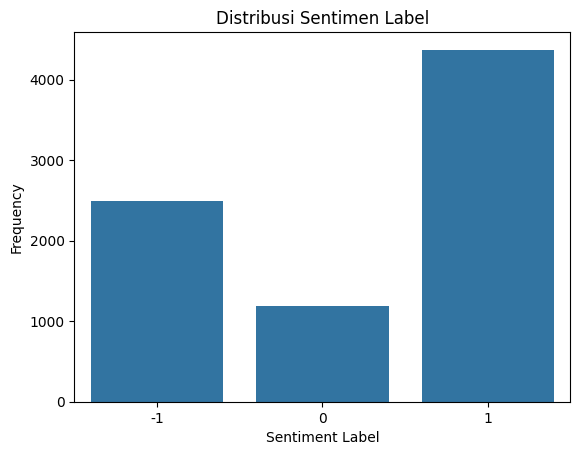

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment_bener', data=df)
plt.title('Distribusi Sentimen Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()

## Analisis Distribusi Panjang Review


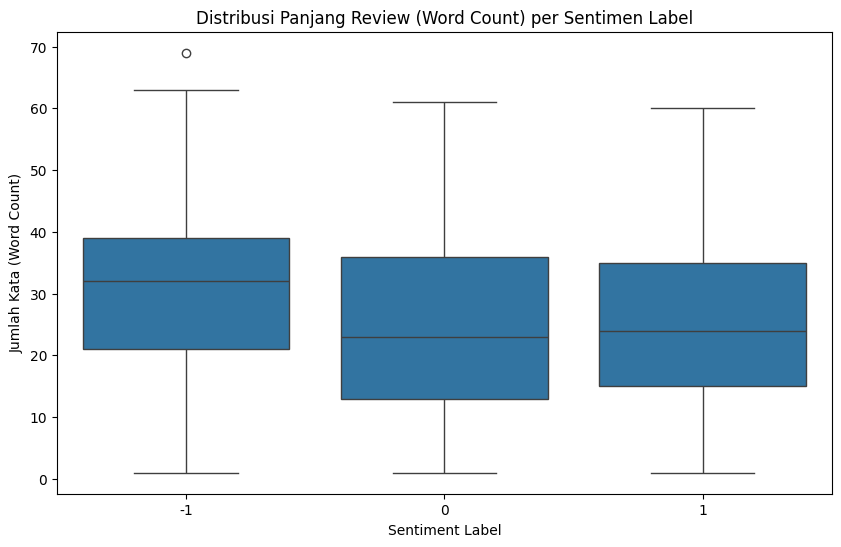

In [ ]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_bener', y='word_count', data=df)
plt.title('Distribusi Panjang Review (Word Count) per Sentimen Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Kata (Word Count)')
plt.show()

## Kata Paling Sering Muncul per Rating dan Sentimen

In [ ]:
import nltk
import re
from collections import Counter

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

stop_words_id = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words_id and len(word) > 2]  # Remove stopwords and short words
    return tokens

df['processed_review_words'] = df['review'].apply(preprocess_text)

print("Preprocessing function defined and applied. New column 'processed_review_words' created.")
df.head()

Preprocessing function defined and applied. New column 'processed_review_words' created.


,nama_tempat,review,rating,sentiment_bener,word_count,processed_review_words
0,101Urban Jakarta Glodok - Kota Tua,"Fasilitas amenities, seperti hal kopi teh yang...",1,-1,16,"[fasilitas, amenities, kopi, teh, disediakan, ..."
1,101Urban Jakarta Glodok - Kota Tua,dsini pelayanannya sangat buruk.. dan hotelnya...,1,-1,38,"[dsini, pelayanannya, buruk, hotelnya, jelek, ..."
2,101Urban Jakarta Glodok - Kota Tua,"Kamar bau bnget, saya baru check in trus langs...",1,-1,43,"[kamar, bau, bnget, check, trus, langsung, che..."
3,101Urban Jakarta Glodok - Kota Tua,"bad service, hotel belum jadi baru take over u...",1,0,10,"[bad, service, hotel, take, over, udah, dijual]"
4,101Urban Jakarta Glodok - Kota Tua,"Pelayanannya bagus,\nUntuk roomnya kurang pert...",1,-1,21,"[pelayanannya, bagus, roomnya, masuk, bau, ape..."


In [ ]:
from nltk.util import ngrams

df['rating'] = df['rating'].astype(str).str.replace(',', '.', regex=False)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Drop rows where rating became NaN after conversion, in case some non-numeric values exist
df.dropna(subset=['rating'], inplace=True)

# Round the rating to the nearest integer
df['rating'] = df['rating'].round().astype(int)

unique_combinations = df[['rating', 'sentiment_bener']].drop_duplicates().to_records(index=False)

for rating, sentiment_bener in unique_combinations:
    print(f"\nRating: {rating}, Sentiment: {sentiment_bener}")

    # Filter DataFrame for the current combination
    filtered_df = df[(df['rating'] == rating) & (df['sentiment_bener'] == sentiment_bener)]

    # Concatenate all processed words
    all_words = [word for sublist in filtered_df['processed_review_words'] for word in sublist]

    # Count single word frequencies
    word_counts = Counter(all_words)
    top_10_words = word_counts.most_common(10)

    print("  Top 10 Single Words:")
    if top_10_words:
        for word, count in top_10_words:
            print(f"  - {word}: {count}")
    else:
        print("  No single words found for this combination.")

    # Generate bigrams
    all_bigrams = list(ngrams(all_words, 2))
    bigram_counts = Counter(all_bigrams)
    top_10_bigrams = bigram_counts.most_common(10)

    print("  Top 10 Bigrams:")
    if top_10_bigrams:
        for bigram, count in top_10_bigrams:
            print(f"  - {' '.join(bigram)}: {count}")
    else:
        print("  No bigrams found for this combination.")


Rating: 1, Sentiment: -1
  Top 10 Single Words:
  - kamar: 854
  - hotel: 459
  - nya: 414
  - kotor: 261
  - gak: 245
  - banget: 197
  - bau: 179
  - mandi: 172
  - jam: 144
  - air: 140
  Top 10 Bigrams:
  - kamar mandi: 120
  - masuk kamar: 52
  - kamar bau: 39
  - bau rokok: 33
  - check out: 31
  - kamar kotor: 30
  - kamar nya: 30
  - air panas: 24
  - mandi kotor: 23
  - menginap hotel: 21

Rating: 1, Sentiment: 0
  Top 10 Single Words:
  - kamar: 63
  - hotel: 56
  - nya: 25
  - banget: 24
  - gak: 21
  - harga: 20
  - check: 19
  - sesuai: 17
  - jam: 17
  - aja: 16
  Top 10 Bigrams:
  - kamar mandi: 10
  - kamar sesuai: 3
  - kamar hotel: 3
  - kamar gak: 3
  - hotel jam: 3
  - cek out: 3
  - nasi goreng: 3
  - bau rokok: 3
  - jam malam: 3
  - check out: 3

Rating: 1, Sentiment: 1
  Top 10 Single Words:
  - bagusnya: 1
  - kamar: 1
  - luas: 1
  - kota: 1
  Top 10 Bigrams:
  - bagusnya kamar: 1
  - kamar luas: 1
  - luas kota: 1

Rating: 2, Sentiment: -1
  Top 10 Single Wo

## Visualisasi Rating vs. Sentimen


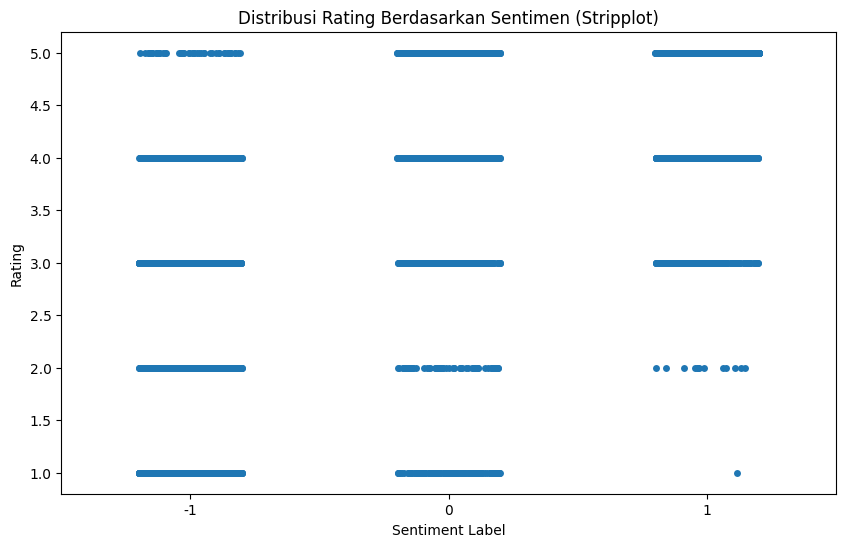

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows where rating became NaN after conversion
df.dropna(subset=['rating'], inplace=True)

# Create the stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='sentiment_bener', y='rating', data=df, jitter=0.2) # jitter adds some random noise to prevent exact overlap
plt.title('Distribusi Rating Berdasarkan Sentimen (Stripplot)')
plt.xlabel('Sentiment Label')
plt.ylabel('Rating')
plt.show()

## Deteksi Outlier Berdasarkan Panjang Review



In [ ]:
outlier_reviews = df[(df['word_count'] <= 3)]
print("Reviews with 1-3 words (potential outliers):")
print(outlier_reviews[['review', 'rating', 'sentiment_bener']])

Reviews with 1-3 words (potential outliers):
                         review  rating  sentiment_bener
23                 jelek sempit       1               -1
24    asyik sangat menyenangkan       1                0
25         Bisa minta infonya..       1                0
238        wifinya hilang terus       1                0
329       Hotelnya banyak kecoa       1               -1
...                         ...     ...              ...
7440                Promo Malam       5                0
7455    Nyaman ramah terpuaskan       5                1
7556         Sangat memuaskan !       5                1
7588        PUAS, Bersih, ramah       5                1
7591            pelayanan bagus       5                1

[139 rows x 3 columns]


#Data preprocessing

In [ ]:
import re

def clean_text(text):
    text = str(text)  # Convert to string to handle potential non-string inputs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Strip leading/trailing whitespace
    text = text.casefold()  # Convert to lowercase
    return text

df['review'] = df['review'].apply(clean_text)

print("Review column cleaned using the defined clean_text function.")

Review column cleaned using the defined clean_text function.


In [ ]:
label_mapping = {-1: 0, 0: 1, 1: 2}
df["sentiment_bener"] = df["sentiment_bener"].apply(lambda x: label_mapping.get(x, x))

num_labels = len(label_mapping)
print(f"Number of labels: {num_labels}")
print(df['sentiment_bener'].unique())

Number of labels: 3
[0 1 2]


In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_temp = train_test_split(
    df,
    test_size=0.2,
    stratify=df['sentiment_bener'],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['sentiment_bener'],
    random_state=42
)
x_train = df_train['review']
y_train = df_train['sentiment_bener']

x_val = df_val['review']
y_val = df_val['sentiment_bener']

x_test = df_test['review']
y_test = df_test['sentiment_bener']


In [ ]:
import sys
import random
import numpy as np
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Check if 'transformers' is installed, if not, install it
try:
    import transformers
except ImportError:
    print("Installing transformers...")
    !{sys.executable} -m pip install transformers tensorflow
    print("Transformers and TensorFlow installed.")

2025-12-19 14:02:24.186808: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766152944.375387      95 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766152944.428882      95 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1766152944.888219      95 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766152944.888267      95 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1766152944.888269      95 computation_placer.cc:177] computation placer alr

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

### 2. Tokenisasi dengan IndoBERT


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('indolem/indobert-base-uncased')

def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=256,
        return_tensors='tf'
    )

print("Tokenizing datasets...")
train_encodings = tokenize_function(x_train)
val_encodings   = tokenize_function(x_val)
test_encodings  = tokenize_function(x_test)

print("Tokenization complete.")


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Tokenizing datasets...


I0000 00:00:1766152968.020400      95 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766152968.024286      95 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Tokenization complete.


### 3. Persiapan Dataset TensorFlow

Mengonversi data tokenized dan label menjadi format `tf.data.Dataset`.

In [ ]:
def create_tf_dataset(encodings, labels, batch_size=16):
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    ))
    return dataset.shuffle(len(labels), seed=SEED).batch(batch_size)

train_dataset = create_tf_dataset(train_encodings, y_train)
val_dataset   = create_tf_dataset(val_encodings, y_val)
test_dataset  = create_tf_dataset(test_encodings, y_test)

print("TensorFlow datasets created.")

TensorFlow datasets created.


In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))


NEUTRAL_LABEL = 1
class_weight_dict[NEUTRAL_LABEL] *= 1.5

print("Adjusted class weights:", class_weight_dict)


Adjusted class weights: {0: np.float64(1.07660143836762), 1: np.float64(3.3986272439281944), 2: np.float64(0.6135735392240969)}


### 4. Memuat dan Melatih Model IndoBERT


In [ ]:
def build_model(learning_rate=2e-5):#calling indobert pretrained
    model = TFAutoModelForSequenceClassification.from_pretrained(
        'indolem/indobert-base-uncased',
        num_labels=num_labels,
        from_pt=True
    )

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#definisikan model bagaimana model belajar, dan matriks perhitunganya
    model.compile(
        optimizer=optimizer,
        loss=loss_fn,
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
    )
    return model


model = build_model(learning_rate=2e-5)

#pencegahan supaa model berhenti sebelum overfit
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=2,
        restore_best_weights=True
    )
]

print("Model compiled. Starting training...")

#melatih model menggunakan training data
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,
    callbacks=callbacks,
    class_weight=class_weight_dict
)
print("Model training complete.")


pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model compiled. Starting training...
Epoch 1/5


I0000 00:00:1766153002.003191     163 service.cc:152] XLA service 0x7c82303bc400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766153002.003227     163 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766153002.003230     163 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766153002.088454     163 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1766153002.271285     163 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


403/403 [==============================] - 194s 358ms/step - loss: 0.9999 - accuracy: 0.5653 - val_loss: 0.7653 - val_accuracy: 0.6509
Epoch 2/5
403/403 [==============================] - 140s 348ms/step - loss: 0.8363 - accuracy: 0.6832 - val_loss: 0.7277 - val_accuracy: 0.6882
Epoch 3/5
403/403 [==============================] - 140s 348ms/step - loss: 0.7733 - accuracy: 0.7073 - val_loss: 0.6683 - val_accuracy: 0.7056
Epoch 4/5
403/403 [==============================] - 140s 348ms/step - loss: 0.6752 - accuracy: 0.7603 - val_loss: 0.6301 - val_accuracy: 0.7516
Epoch 5/5
403/403 [==============================] - 139s 344ms/step - loss: 0.5718 - accuracy: 0.7994 - val_loss: 0.7178 - val_accuracy: 0.7230
Model training complete.


### 5. Evaluasi Model

Membuat prediksi pada data pengujian dan menampilkan `classification_report`.

In [ ]:
print("Evaluating model on test data...")

predictions_logits = model.predict(test_dataset).logits
predictions = tf.argmax(predictions_logits, axis=-1).numpy()

target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(
    y_test,
    predictions,
    target_names=target_names,
    zero_division=0
))

print("Model evaluation complete.")

Evaluating model on test data...
51/51 [==============================] - 8s 100ms/step
              precision    recall  f1-score   support

    Negative       0.33      0.24      0.28       249
     Neutral       0.14      0.21      0.17       119
    Positive       0.57      0.58      0.57       437

    accuracy                           0.42       805
   macro avg       0.35      0.34      0.34       805
weighted avg       0.43      0.42      0.42       805

Model evaluation complete.


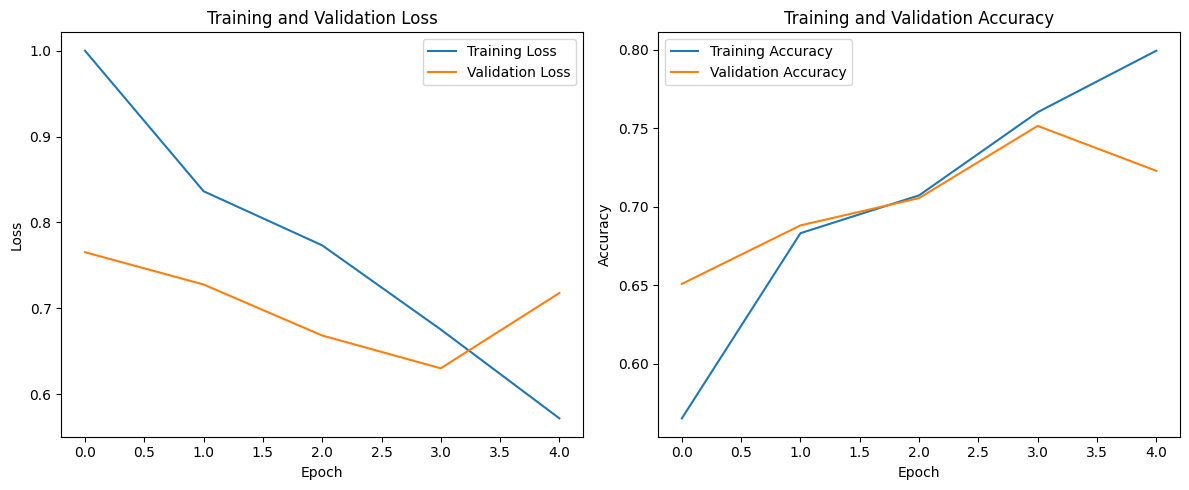

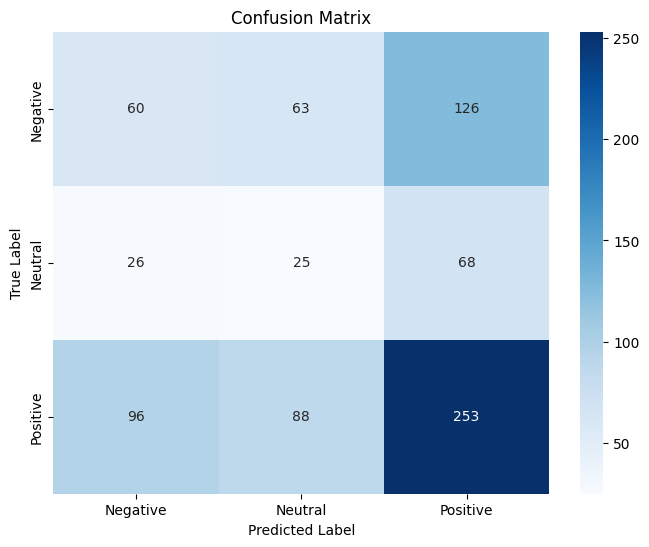

Visualizations of training history and confusion matrix generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Visualizations of training history and confusion matrix generated.")

#tuning model

In [ ]:
from sklearn.metrics import f1_score

results = []

learning_rates = [1e-5, 2e-5, 3e-5]

for lr in learning_rates:
    print(f"\n==============================")
    print(f"Training with learning rate = {lr}")
    print(f"==============================")

    # Build NEW model (RESET WEIGHT)
    model = build_model(learning_rate=lr)

    history = model.fit(
        train_dataset,
        epochs=3,
        validation_data=val_dataset,
        callbacks=callbacks,
        verbose=1
    )

    # Validation prediction
    val_logits = model.predict(val_dataset).logits
    val_preds = tf.argmax(val_logits, axis=-1).numpy()

    f1 = f1_score(y_val, val_preds, average='macro')
    print(f"Validation Macro F1: {f1:.4f}")

    results.append({
        "learning_rate": lr,
        "val_f1_macro": f1
    })

print("\nLR TUNING RESULTS")
for r in results:
    print(r)



Training with learning rate = 1e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
403/403 [==============================] - 199s 375ms/step - loss: 0.6951 - accuracy: 0.7168 - val_loss: 0.5659 - val_accuracy: 0.7826
Epoch 2/3
403/403 [==============================] - 141s 349ms/step - loss: 0.5407 - accuracy: 0.7862 - val_loss: 0.5726 - val_accuracy: 0.7789
Epoch 3/3
51/51 [==============================] - 8s 99ms/step
Validation Macro F1: 0.3446

Training with learning rate = 2e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
403/403 [==============================] - 199s 374ms/step - loss: 0.6475 - accuracy: 0.7443 - val_loss: 0.5443 - val_accuracy: 0.7888
Epoch 2/3
403/403 [==============================] - 140s 348ms/step - loss: 0.5240 - accuracy: 0.7918 - val_loss: 0.5511 - val_accuracy: 0.7826
Epoch 3/3
51/51 [==============================] - 8s 101ms/step
Validation Macro F1: 0.3309

Training with learning rate = 3e-05


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
403/403 [==============================] - 199s 378ms/step - loss: 0.6580 - accuracy: 0.7416 - val_loss: 0.5789 - val_accuracy: 0.7615
Epoch 2/3
403/403 [==============================] - 140s 348ms/step - loss: 0.5213 - accuracy: 0.7990 - val_loss: 0.6253 - val_accuracy: 0.7801
Epoch 3/3
51/51 [==============================] - 8s 100ms/step
Validation Macro F1: 0.3034

LR TUNING RESULTS
{'learning_rate': 1e-05, 'val_f1_macro': 0.34459736853643275}
{'learning_rate': 2e-05, 'val_f1_macro': 0.33093581508250325}
{'learning_rate': 3e-05, 'val_f1_macro': 0.30339620719557914}


In [ ]:
best_lr = 1e-5  # ganti sesuai hasil LR tuning

epoch_candidates = [2, 3, 4, 5]
epoch_results = []

for ep in epoch_candidates:
    print(f"\n==============================")
    print(f"Training with epochs = {ep}")
    print(f"==============================")

    model = build_model(learning_rate=best_lr)

    history = model.fit(
        train_dataset,
        epochs=ep,
        validation_data=val_dataset,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1
    )

    val_logits = model.predict(val_dataset).logits
    val_preds = tf.argmax(val_logits, axis=-1).numpy()

    f1 = f1_score(y_val, val_preds, average='macro')
    print(f"Validation Macro F1: {f1:.4f}")

    epoch_results.append({
        "epochs": ep,
        "val_f1_macro": f1
    })

print("\nEPOCH TUNING RESULTS")
for r in epoch_results:
    print(r)



Training with epochs = 2


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
403/403 [==============================] - 197s 375ms/step - loss: 1.0212 - accuracy: 0.5451 - val_loss: 0.6922 - val_accuracy: 0.7230
Epoch 2/2
51/51 [==============================] - 7s 98ms/step
Validation Macro F1: 0.3231

Training with epochs = 3


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
403/403 [==============================] - 196s 370ms/step - loss: 1.0457 - accuracy: 0.5040 - val_loss: 0.7820 - val_accuracy: 0.6609
Epoch 2/3
403/403 [==============================] - 139s 346ms/step - loss: 0.8380 - accuracy: 0.6902 - val_loss: 0.6697 - val_accuracy: 0.7093
Epoch 3/3
51/51 [==============================] - 8s 98ms/step
Validation Macro F1: 0.3435

Training with epochs = 4


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
403/403 [==============================] - 196s 372ms/step - loss: 1.0440 - accuracy: 0.5040 - val_loss: 0.6401 - val_accuracy: 0.7540
Epoch 2/4
403/403 [==============================] - 139s 346ms/step - loss: 0.8615 - accuracy: 0.6801 - val_loss: 0.6389 - val_accuracy: 0.7366
Epoch 3/4
403/403 [==============================] - 139s 344ms/step - loss: 0.7810 - accuracy: 0.7087 - val_loss: 0.6409 - val_accuracy: 0.7317
Epoch 4/4
51/51 [==============================] - 8s 99ms/step
Validation Macro F1: 0.3439

Training with epochs = 5


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
403/403 [==============================] - 197s 372ms/step - loss: 1.0616 - accuracy: 0.4892 - val_loss: 0.6824 - val_accuracy: 0.7329
Epoch 2/5
403/403 [==============================] - 139s 345ms/step - loss: 0.8378 - accuracy: 0.6895 - val_loss: 0.7977 - val_accuracy: 0.6770
Epoch 3/5
403/403 [==============================] - 139s 345ms/step - loss: 0.7689 - accuracy: 0.7177 - val_loss: 0.6133 - val_accuracy: 0.7615
Epoch 4/5
403/403 [==============================] - 139s 344ms/step - loss: 0.6888 - accuracy: 0.7606 - val_loss: 0.8009 - val_accuracy: 0.6708
Epoch 5/5
51/51 [==============================] - 8s 99ms/step
Validation Macro F1: 0.3243

EPOCH TUNING RESULTS
{'epochs': 2, 'val_f1_macro': 0.32311545938266956}
{'epochs': 3, 'val_f1_macro': 0.3435180172256575}
{'epochs': 4, 'val_f1_macro': 0.34387366818873666}
{'epochs': 5, 'val_f1_macro': 0.3242793778457882}


In [ ]:
batch_sizes = [8, 16, 32]
best_lr = 1e-5
best_epoch = 3

batch_results = []

for bs in batch_sizes:
    print(f"\n==============================")
    print(f"Training with batch size = {bs}")
    print(f"==============================")

    train_dataset_bs = create_tf_dataset(train_encodings, y_train, batch_size=bs)
    val_dataset_bs   = create_tf_dataset(val_encodings, y_val, batch_size=bs)

    model = build_model(learning_rate=best_lr)

    history = model.fit(
        train_dataset_bs,
        epochs=best_epoch,
        validation_data=val_dataset_bs,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1
    )

    val_logits = model.predict(val_dataset_bs).logits
    val_preds = tf.argmax(val_logits, axis=-1).numpy()

    f1 = f1_score(y_val, val_preds, average='macro')
    print(f"Validation Macro F1: {f1:.4f}")

    batch_results.append({
        "batch_size": bs,
        "val_f1_macro": f1
    })

print("\nBATCH SIZE TUNING RESULTS")
for r in batch_results:
    print(r)



Training with batch size = 8


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
805/805 [==============================] - 207s 202ms/step - loss: 1.0353 - accuracy: 0.5343 - val_loss: 0.7448 - val_accuracy: 0.6398
Epoch 2/3
805/805 [==============================] - 148s 184ms/step - loss: 0.8258 - accuracy: 0.6863 - val_loss: 0.6819 - val_accuracy: 0.6981
Epoch 3/3
101/101 [==============================] - 10s 54ms/step
Validation Macro F1: 0.3206

Training with batch size = 16


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
403/403 [==============================] - 194s 370ms/step - loss: 1.0454 - accuracy: 0.5097 - val_loss: 0.7382 - val_accuracy: 0.6671
Epoch 2/3
403/403 [==============================] - 139s 345ms/step - loss: 0.8373 - accuracy: 0.6797 - val_loss: 0.7196 - val_accuracy: 0.6845
Epoch 3/3
51/51 [==============================] - 8s 98ms/step
Validation Macro F1: 0.3173

Training with batch size = 32


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
202/202 [==============================] - 187s 701ms/step - loss: 1.0751 - accuracy: 0.4828 - val_loss: 0.7385 - val_accuracy: 0.7006
Epoch 2/3
202/202 [==============================] - 137s 678ms/step - loss: 0.8573 - accuracy: 0.6811 - val_loss: 0.7359 - val_accuracy: 0.6919
Epoch 3/3
26/26 [==============================] - 8s 196ms/step
Validation Macro F1: 0.3158

BATCH SIZE TUNING RESULTS
{'batch_size': 8, 'val_f1_macro': 0.3205691709205261}
{'batch_size': 16, 'val_f1_macro': 0.3173040643954756}
{'batch_size': 32, 'val_f1_macro': 0.31577590244925446}


In [ ]:
print("Evaluating model on test data...")

predictions_logits = model.predict(test_dataset).logits
predictions = tf.argmax(predictions_logits, axis=-1).numpy()

target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(
    y_test,
    predictions,
    target_names=target_names,
    zero_division=0
))

print("Model evaluation complete.")

Evaluating model on test data...
51/51 [==============================] - 8s 101ms/step
              precision    recall  f1-score   support

    Negative       0.31      0.28      0.29       249
     Neutral       0.15      0.26      0.19       119
    Positive       0.58      0.50      0.54       437

    accuracy                           0.39       805
   macro avg       0.35      0.34      0.34       805
weighted avg       0.43      0.39      0.41       805

Model evaluation complete.


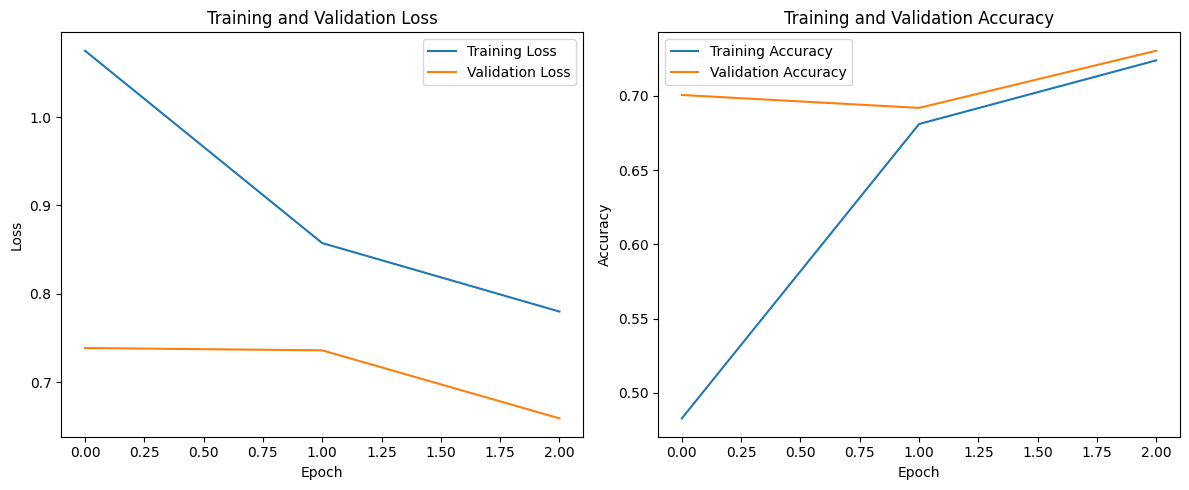

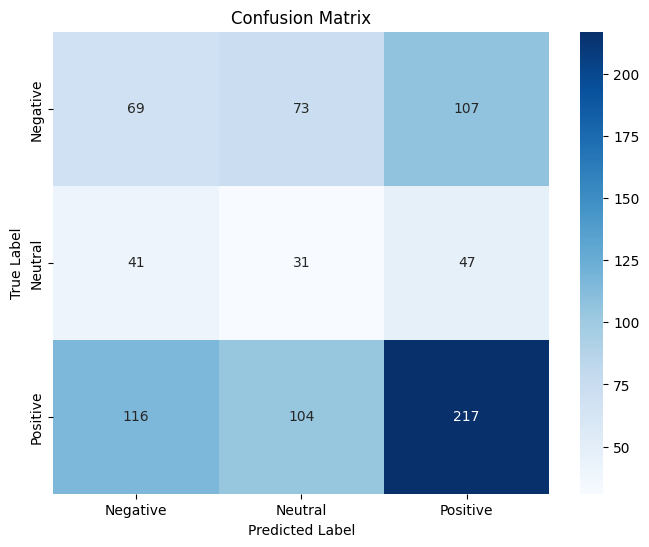

Visualizations of training history and confusion matrix generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Visualizations of training history and confusion matrix generated.")

Recomendations

In [ ]:
def tokenize_all(texts):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=256,
        return_tensors='tf'
    )

print("Tokenizing full dataset...")
all_encodings = tokenize_all(df['review'])


Tokenizing full dataset...


In [ ]:
full_dataset = tf.data.Dataset.from_tensor_slices(
    dict(all_encodings)
).batch(32)  # pakai batch size terbaik


In [ ]:
print("Predicting sentiment for all reviews...")
logits = model.predict(full_dataset).logits
predictions = tf.argmax(logits, axis=-1).numpy()


Predicting sentiment for all reviews...
252/252 [==============================] - 63s 239ms/step


In [ ]:
label_map = {
    0: 'Negative',
    1: 'Neutral',
    2: 'Positive'
}

df['predicted_sentiment'] = [label_map[p] for p in predictions]

df[['review', 'predicted_sentiment']].head()


,review,predicted_sentiment
0,fasilitas amenities seperti hal kopi teh yang ...,Neutral
1,dsini pelayanannya sangat buruk dan hotelnya s...,Negative
2,kamar bau bnget saya baru check in trus langsu...,Negative
3,bad service hotel belum jadi baru take over ud...,Neutral
4,pelayanannya bagus untuk roomnya kurang pertam...,Negative


In [ ]:
df.head(3)

,nama_tempat,review,rating,sentiment_bener,word_count,processed_review_words,predicted_sentiment
0,101Urban Jakarta Glodok - Kota Tua,fasilitas amenities seperti hal kopi teh yang ...,1,0,16,"[fasilitas, amenities, kopi, teh, disediakan, ...",Neutral
1,101Urban Jakarta Glodok - Kota Tua,dsini pelayanannya sangat buruk dan hotelnya s...,1,0,38,"[dsini, pelayanannya, buruk, hotelnya, jelek, ...",Negative
2,101Urban Jakarta Glodok - Kota Tua,kamar bau bnget saya baru check in trus langsu...,1,0,43,"[kamar, bau, bnget, check, trus, langsung, che...",Negative


In [ ]:
hotel_sentiment = (
    df
    .groupby(['nama_tempat', 'predicted_sentiment'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

hotel_sentiment.head()
hotel_sentiment.columns.name = None

In [ ]:
hotel_sentiment['total_reviews'] = (
    hotel_sentiment['Positive'] +
    hotel_sentiment['Neutral'] +
    hotel_sentiment['Negative']
)

hotel_sentiment['sentiment_score'] = (
    (2 * hotel_sentiment['Positive']) +
    (1 * hotel_sentiment['Neutral']) -
    (2 * hotel_sentiment['Negative'])
) / hotel_sentiment['total_reviews']


In [ ]:
hotel_sentiment = hotel_sentiment.sort_values(
    by='sentiment_score',
    ascending=False
).reset_index(drop=True)

hotel_sentiment['rank'] = hotel_sentiment.index + 1


In [ ]:
def recommendation_label(score):
    if score >= 0.6:
        return 'Highly Recommended'
    elif score >= 0.3:
        return 'Recommended'
    else:
        return 'Not Recommended'

hotel_sentiment['recommendation'] = hotel_sentiment['sentiment_score'].apply(recommendation_label)

hotel_sentiment.head(5)


,nama_tempat,Negative,Neutral,Positive,total_reviews,sentiment_score,rank,recommendation
0,Heef Hotel,0,2,68,70,1.971429,1,Highly Recommended
1,Zuri Express Mangga Dua,0,4,66,70,1.942857,2,Highly Recommended
2,PARK HOTEL Cawang - Jakarta,1,4,65,70,1.885714,3,Highly Recommended
3,Oria Hotel,1,6,63,70,1.857143,4,Highly Recommended
4,Holiday Inn Express Jakarta Matraman by IHG,2,3,65,70,1.842857,5,Highly Recommended
